# Rasterplots
-----

Notebook for rasterplot examples on fused organoid. 

The following figures can be found here:
>1. Figure 4b,f

**load libraries**

In [1]:
import os
import numpy as np

os.chdir('../..')

from fused_org_ephys import FusedOrgSpikes, rasterplot_inlet

**load spike times**

Load mua spike times using the ```FusedOrgSpikes``` class. See the following notebook for analysis details [here](https://github.com/mzabolocki/miscos_ephys/blob/main/analysis/mua_spikes/mua_spikes.ipynb). 

In [2]:
spikes_str = FusedOrgSpikes(spikearr_fpath = 'Data/DR008_2_2021-12-22_20-04-02_64P.pkl')
spikes_cortical = FusedOrgSpikes(spikearr_fpath = 'Data/DR019_2023-05-06_18-43-42.pkl')

loading Data/DR008_2_2021-12-22_20-04-02_64P.pkl
loading Data/DR019_2023-05-06_18-43-42.pkl


## **Figure 4b:** opto rasterplots (striatal organoids recordings)
-----------

Example rasterplot with optogenetic stimulation for silicon probe recordings in striatal organoids, and optogenetic stimulation in ventral midbrain. 

First, filter for active channels. 

In [3]:
baseline_opto_start = spikes_str.metadata['1_syncmessage_time'].values[0]
stim_length = 10*60

print(f'baseline opto start: {baseline_opto_start}')

spikes_str.set_activechannels(spk_activechan_interval = [baseline_opto_start, baseline_opto_start+stim_length], spk_count_thresh = 50)

baseline opto start: 629.2
filter channels with >= 5.0 spks/min | time interval [629.2, 1229.2] seconds


Set optogenetic parameters. 

In [4]:
train_dur = stim_length # length of optogenetic stimulus
interval = 10 # pulse interval in ms
dur = 0.5 # pulse duration in ms

spikes_str.set_baseline_optostim(start=baseline_opto_start, train_dur=train_dur, interval=interval, dur=dur)

Set network events. 

In [5]:
spikes_str.set_network_event

generating network event vector using active channels


Set main crop as +/- 100 seconds from baseline. 

In [6]:
baseline_crop = [baseline_opto_start-100, baseline_opto_start+100]

Plot example rasterplot with inlet. 

The directory already exists for figures/main_figure/
saving to: figures/main_figure/DR08_str_rasterplot.pdf
saved


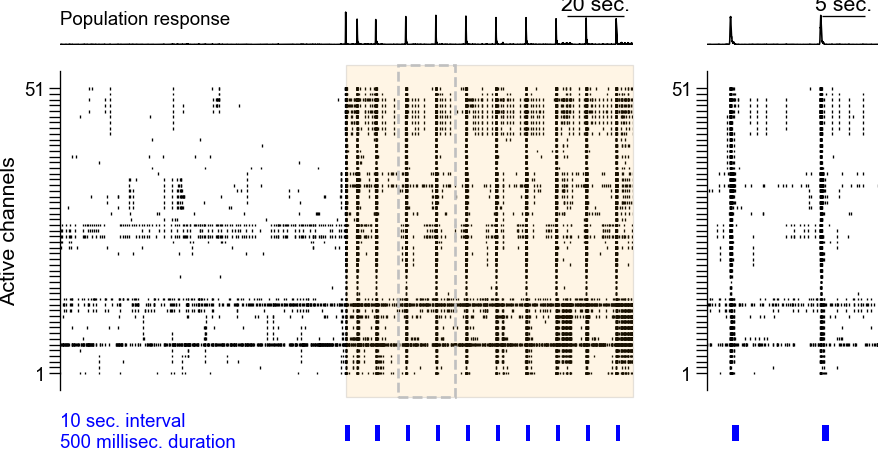

In [7]:
rasterplot_inlet(mua_spikes=spikes_str.active_chans_mua_spikes, network_events=spikes_str.network_events, srate=spikes_str.srate,
                 axin_xlim=[647.2, 647.2+20], baseline_crop=baseline_crop, optostim_times=spikes_str.baseline_optostim_times,
                 baseline_opto_start=baseline_opto_start, fname='DR08_str_rasterplot', save_folder='figures/main_figure/') 

## **Figure 4f:** opto rasterplots (cortical organoid recordings)
----
Example rasterplot with optogenetic stimulation for silicon probe recordings in cortical organoids, and optogenetic stimulation in ventral midbrain. 

Filter for active channels. 

In [8]:
baseline_opto_start = spikes_cortical.metadata['1_syncmessage_time'].values[0]
stim_length = 10*60

print(f'baseline opto start: {baseline_opto_start}')

spikes_cortical.set_activechannels(spk_activechan_interval = [baseline_opto_start, baseline_opto_start+stim_length], spk_count_thresh = 50)

baseline opto start: 600.0
filter channels with >= 5.0 spks/min | time interval [600.0, 1200.0] seconds


Set optogenetic parameters. 

In [9]:
train_dur = stim_length # length of optogenetic stimulus
interval = 10 # pulse interval in ms
dur = 0.5 # pulse duration in ms

spikes_cortical.set_baseline_optostim(start=baseline_opto_start, train_dur=train_dur, interval=interval, dur=dur)

Set network events. 

In [10]:
spikes_cortical.set_network_event # set network events

generating network event vector using active channels


Set crop limits for baseline +/- 100 seconds. 

In [11]:
baseline_crop = [baseline_opto_start-100, baseline_opto_start+100]

Plot example rasterplot with inlet. 

The new directory is created for figures/main_figure/
saving to: figures/main_figure/DR019_cort_rasterplot.pdf
saved


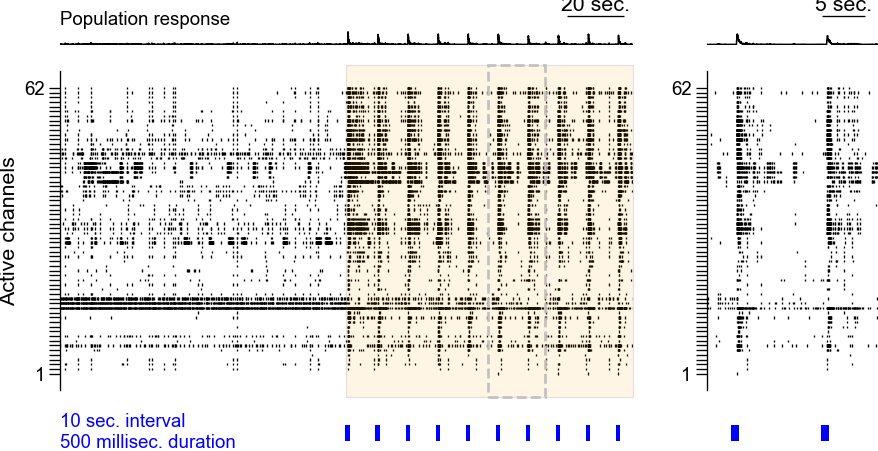

In [12]:
rasterplot_inlet(mua_spikes=spikes_cortical.active_chans_mua_spikes, network_events=spikes_cortical.network_events, srate=spikes_cortical.srate,
                 axin_xlim=[649.55, 649.55+20], baseline_crop=baseline_crop, optostim_times=spikes_cortical.baseline_optostim_times,
                 baseline_opto_start=baseline_opto_start, fname='DR019_cort_rasterplot', save_folder='figures/main_figure/')